In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud,STOPWORDS

In [3]:
df_orig = pd.read_csv("resume_dataset.csv")
df = df_orig.copy(deep = True)

In [4]:
length = df["Resume"].shape
length

(1219,)

In [5]:
df["res_new"] = df["Resume"]
eval_res = df["res_new"].copy(deep=True)


In [6]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

In [7]:
#eval_res = Resumes
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        eval_res[i] = eval(eval_res[i]).decode()
    except:
        l.append(i)
        pass

In [8]:
eval_res.shape

(1219,)

In [9]:
df["res_new"] = eval_res
df = df.drop(l,axis=0)
#print(df[30:40])
df = df.reset_index(drop = True)

In [10]:
df.shape

(1212, 4)

In [11]:
df = df[["ID","Category","res_new","Resume"]]
df['res_new'].replace('', np.nan, inplace=True)
df.dropna(subset=['res_new'], inplace=True)
df = df.reset_index(drop = True)
df.shape
df.head()

/tmp/ipython-input-11-1306434844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['res_new'].replace('', np.nan, inplace=True)
/tmp/ipython-input-11-1306434844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_new'].replace('', np.nan, inplace=True)
/tmp/ipython-input-11-1306434844.py:3: SettingWithCopyWarning: 
A value is tryi

,ID,Category,res_new,Resume
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [12]:
length = df["res_new"].shape
eval_res = df["res_new"].copy(deep=True)
df.shape

(1199, 4)

In [13]:
length

(1199,)

In [18]:
for i in range(length[0]):
    eval_res[i] = " ".join(eval_res[i].split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res[i])) #Removing punctaution later since we need punctaution for sentence tokenization
    eval_res[i] = " ".join(token).lower()
eval_res_backup  = eval_res.copy(deep = True)


In [36]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [19]:
for i in range(length[0]):
    eval_res[i] = (eval_res[i].encode("ASCII","ignore")).decode() #encoding the text to ascii.
eval_res.shape

(1199,)

In [20]:
df["res_new"] = eval_res

In [21]:
df_cols = ["ID","Category","res_new","Resume"]
df = df[df_cols]
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [22]:
REGEX_SPACE = re.compile("[ ][ ]+")
REGEX_JUNK = re.compile("[^A-WX-wyz][xX][^A-WX-wyz]+[ ]*|[.\-\_][.\-\_]+")
REGEX_EMAIL = re.compile("[Xx]+[._]?[Xx]+.@.[Xx]+\.?[Xx]+")
REGEX_PNO = re.compile("[(][xX][xX][xX][)][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][\-][xX][xX][xX]+[-][xX][xX][xX]+")

In [23]:
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [24]:
df["newer_res"] = df["res_new"]
for i,j in enumerate(df.itertuples()):
    strin = re.sub(REGEX_PNO,"",j[3])
    strin = re.sub(REGEX_EMAIL,"",strin)
    strin = re.sub(REGEX_SPACE,"",strin)
    strin  =re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', strin)
    strin = re.sub(REGEX_JUNK, "" ,strin)
    df["newer_res"][i] = strin

Streaming output truncated to the last 5000 lines.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["newer_res"][i] = strin
/tmp/ipython-input-24-4272783978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["newer_res"][i] = strin
/tmp/ipython-input-24-4272783978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["newer_res"][i] = strin
/tmp/ipython-input-24-4272783978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [25]:
df = df[["ID","Category","newer_res","Resume"]]
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [26]:
df = df[["ID","Category","newer_res","Resume"]]
df['newer_res'].replace('', np.nan, inplace=True)
df.dropna(subset=['newer_res'], inplace=True)
df = df.reset_index(drop = True)
df.shape

/tmp/ipython-input-26-552359278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['newer_res'].replace('', np.nan, inplace=True)


(1199, 4)

In [27]:
df.to_csv("clean_data1.csv")
print("Cleaned dataset written to cleaned_data.csv")

Cleaned dataset written to cleaned_data.csv


In [28]:
freq = list(collections.Counter(df["Category"]).items())
freq = list(zip(*freq))

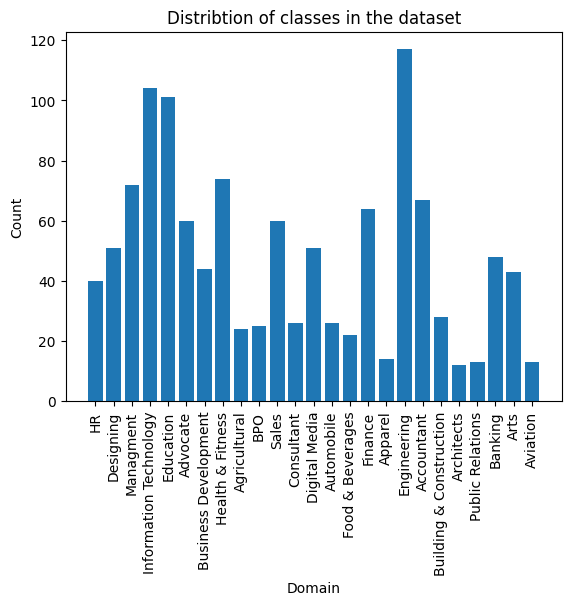

In [29]:
plt.bar(freq[0],freq[1])
plt.ylabel("Count")
plt.xlabel("Domain")
plt.title("Distribtion of classes in the dataset")
plt.xticks(rotation=90)
plt.show()

In [30]:
sw = set(STOPWORDS)
eval_res = df["newer_res"].copy(deep=True)
sw_data=''
for i in eval_res:
    #token = nltk.word_tokentize()
        sw_data+=i
len(sw_data)

6517156

In [31]:
sw = STOPWORDS.union(set(string.punctuation))

In [32]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = sw,
                min_font_size = 13).generate(sw_data)

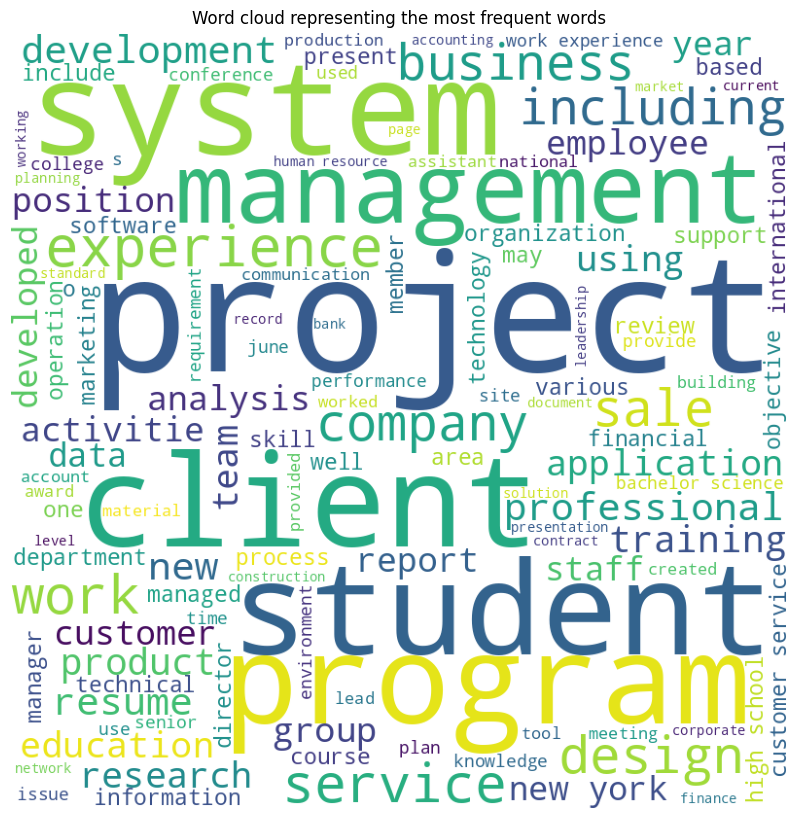

In [33]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word cloud representing the most frequent words")
plt.axis("off")
plt.tight_layout(pad = 0)

In [37]:
length = df.shape

def pos_tag(s):
    # Check if the resource is available before using it (optional, but good practice)
    try:
        nltk.data.find('taggers/averaged_perceptron_tagger_eng')
    except LookupError:
        print("NLTK resource 'averaged_perceptron_tagger_eng' not found. Please run the download cell.")
        return None
    return nltk.pos_tag(s)

adj_list={}
for i in range(length[0]):
    token = nltk.word_tokenize(eval_res[i])
    pos_token = pos_tag(token)
    if pos_token is not None: # Check if pos_tag returned a value
        for word, tag in pos_token:
            if tag in ["JJ","JJR","JJS"]:
                if word in adj_list:
                    adj_list[word]+=1
                else:
                    adj_list[word] = 1

In [38]:
df.shape

(1199, 4)

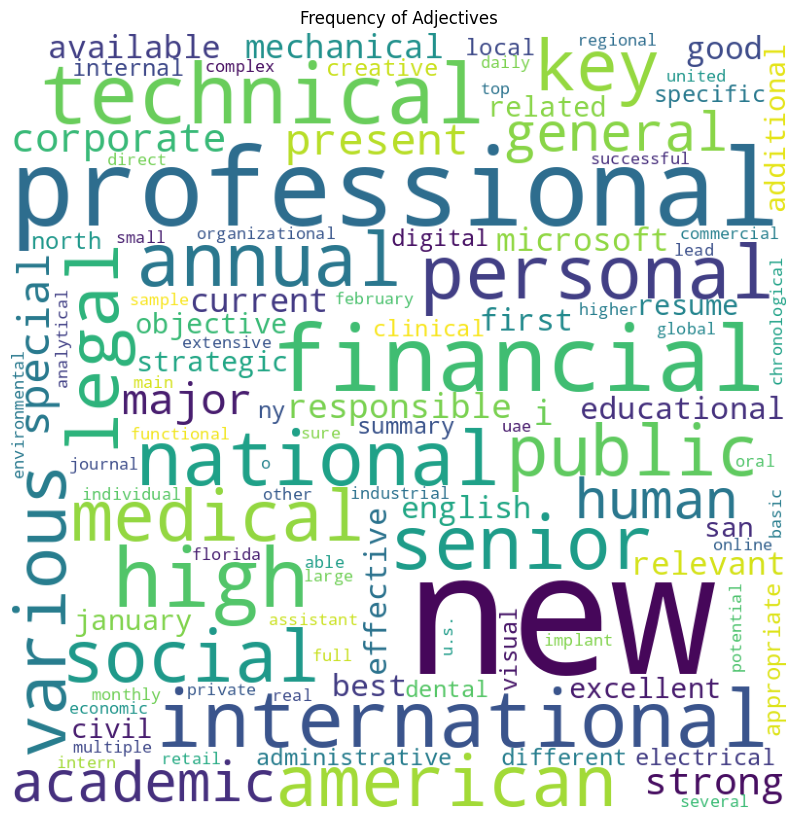

In [39]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = sw,
                min_font_size = 15).generate_from_frequencies(adj_list)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Frequency of Adjectives")
plt.axis("off")
plt.tight_layout(pad = 0)

In [40]:
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [41]:
class_dict = {}

for i in df.itertuples():
    if i[2] not in class_dict:
        class_dict[i[2]] = " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))
    else:
        class_dict[i[2]]+= " " +  " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))

In [42]:
from collections import Counter
window = 2
ngram={}
p=0
for i in class_dict:
    ngram[i]={}
    token = nltk.word_tokenize(class_dict[i])
    for j in range(window,len(token)):
        val = tuple(token[j-2:j])
        if val not in ngram[i]:
            ngram[i][val] = 1
        else:
            ngram[i][val]+=1

In [43]:
{i:sorted(list(j.items()),key=lambda x:x[1],reverse=True)[:10] for (i,j) in ngram.items()}

{'HR': [(('human', 'resources'), 154),
  (('human', 'resource'), 48),
  (('hr', 'policies'), 32),
  (('employee', 'relations'), 32),
  (('training', 'development'), 25),
  (('hr', 'assistant'), 18),
  (('job', 'descriptions'), 18),
  (('professional', 'experience'), 17),
  (('resources', 'manager'), 17),
  (('performance', 'management'), 17)],
 'Designing': [(('user', 'experience'), 47),
  (('graphic', 'design'), 45),
  (('graphic', 'designer'), 40),
  (('o', 'o'), 29),
  (('web', 'developer'), 27),
  (('new', 'york'), 25),
  (('html', 'css'), 22),
  (('adobe', 'photoshop'), 18),
  (('user', 'interface'), 17),
  (('ux', 'designer'), 17)],
 'Managment': [(('project', 'management'), 100),
  (('project', 'manager'), 75),
  (('customer', 'service'), 29),
  (('professional', 'experience'), 28),
  (('manager', 'resume'), 27),
  (('business', 'development'), 25),
  (('training', 'development'), 24),
  (('customer', 'satisfaction'), 23),
  (('page', '2'), 22),
  (('sales', 'marketing'), 20)],
